## V 

Import calls

In [5]:
import sys

import numpy as np
import pandas as pd
import datetime
import time
import sklearn as sk


import requests
import re
from bs4 import BeautifulSoup
from time import sleep
import pickle

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("whitegrid", {'axes.grid' : False})

In [6]:
from sklearn import cross_validation, datasets, linear_model, grid_search, metrics, ensemble, tree
from sklearn import pipeline, manifold, preprocessing, feature_selection, decomposition
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn import preprocessing
from sklearn.learning_curve import learning_curve
from sklearn.cross_validation import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from scipy.stats import rankdata
from sklearn.preprocessing import PolynomialFeatures


# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

/Users/Cyril/anaconda/envs/data-x/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/Cyril/anaconda/envs/data-x/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)
/Users/Cyril/anaconda/envs/data-x/lib/python3.6/site-packages/sklearn/learning_curve.py:22: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the functions are moved. Th

In [7]:
from pandas import Series, DataFrame, Panel
import scipy; 
import scipy.stats as stats; 
from scipy.stats import ttest_ind, ttest_ind_from_stats; from scipy.special import stdtr; 

In [11]:
# Import `Sequential` from `keras.models`
from keras.models import Sequential

# Import `Dense` from `keras.layers`
from keras.layers import Dense

#Import Dropout from keras
from keras.layers import Dropout

#Import regularization from keras
from keras import regularizers

## Loading the data

In [12]:
X = pd.read_csv('features.csv')
X = X.drop('Unnamed: 0' , axis = 1)

In [13]:
y = pd.read_csv('labels.csv')
y = y.drop('Unnamed: 0' , axis = 1)
y = y['S']

### Poly Lasso


Fiting lasso regression on the data


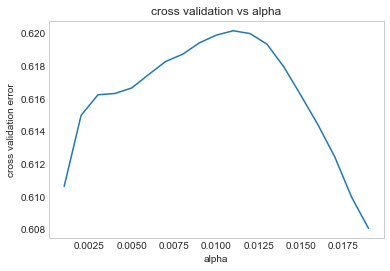


 best alpha is : 0.011 with average cross validation score :  0.620164292696

Out of sample R**2 for lasso regression with alpha =  0.011 is:  0.617413419855
The features that were set to zero are : [1, 3, 4, 5, 6, 7, 9, 10, 17, 19, 23, 25, 26, 28, 33, 34, 36, 45, 47, 48, 49, 50, 51, 52, 53, 54, 56, 57, 58, 59, 60, 61, 62, 64, 65]


In [14]:
print ('\nFiting lasso regression on the data')

poly_false = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_scaled = preprocessing.scale(X)
X_poly = poly_false.fit_transform(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=0)

#Creating grid for search 
grid = np.arange(0.001,0.02,0.001)
cross_val = np.zeros((grid.shape[0],2))

for index,l in enumerate(grid):

    lasso_reg = linear_model.Lasso(alpha=l, max_iter = 1000000 )
    scores = cross_val_score(lasso_reg, X_train, y_train, cv=5)
    avg_score = sum(scores)/len(scores)
    cross_val[index,0] = l
    cross_val[index,1] += avg_score

best_index = np.argmax(cross_val[:,1])
plt.plot(cross_val[:,0],cross_val[:,1])
plt.xlabel('alpha')
plt.ylabel('cross validation error')
plt.title('cross validation vs alpha')
plt.show()

print ('\n best alpha is :', cross_val[best_index,0], 'with average cross validation score : ',cross_val[best_index,1])
# Out of sample error
best_model = linear_model.Lasso(alpha= cross_val[best_index,0])
best_model.fit(X_train,y_train)


R_out = best_model.score(X_test,y_test)
print ('\nOut of sample R**2 for lasso regression with alpha = ',  cross_val[best_index,0], 'is: ', R_out)
#print (best_model.coef_)
zero_weight_features = pd.DataFrame(X_poly).columns[best_model.coef_==0]
print ('The features that were set to zero are :', list(zero_weight_features))

## Elastic Net

In [15]:
print ('\nFiting Elastic Net regression on the data')

poly_false = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_scaled = preprocessing.scale(X)
X_poly = poly_false.fit_transform(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=0)


l1_ratio_grid = np.arange(0.1,1.1,0.1)
a_grid = np.arange(0.01,0.2,0.01)
cross_score = np.zeros((l1_ratio_grid.shape[0],a_grid.shape[0]))

for index_ratio,l1 in enumerate(l1_ratio_grid):
    print(l1)

    for index_a,a in enumerate(a_grid):
        print (a)
        net = linear_model.ElasticNet(alpha=a, l1_ratio=l1, max_iter = 1000000)
        scores = cross_val_score(net, X_train, y_train, cv=5)
        avg_score = sum(scores)/len(scores)
        cross_score[index_ratio,index_a] = avg_score


ind = np.unravel_index(np.argmax(cross_score, axis=None), cross_score.shape)
l1_best = l1_ratio_grid[ind[0]]
a_best = a_grid[ind[1]]
print ('best combination of grid is (l1, a)', l1_best, a_best)

best_model = linear_model.ElasticNet(alpha= a_best, l1_ratio = l1_best)
best_model.fit(X_train,y_train)


R_out = best_model.score(X_test,y_test)
print (R_out)


Fiting Elastic Net regression on the data
0.1
0.01
0.02
0.03
0.04
0.05
0.06
0.07
0.08
0.09
0.1
0.11
0.12
0.13
0.14
0.15
0.16
0.17
0.18
0.19
0.2
0.01
0.02
0.03
0.04
0.05
0.06
0.07
0.08
0.09
0.1
0.11
0.12
0.13
0.14
0.15
0.16
0.17
0.18
0.19
0.3
0.01
0.02
0.03
0.04
0.05
0.06
0.07
0.08
0.09
0.1
0.11
0.12
0.13
0.14
0.15
0.16
0.17
0.18
0.19
0.4
0.01
0.02
0.03
0.04
0.05
0.06
0.07
0.08
0.09
0.1
0.11
0.12
0.13
0.14
0.15
0.16
0.17
0.18
0.19
0.5
0.01
0.02
0.03
0.04
0.05
0.06
0.07
0.08
0.09
0.1
0.11
0.12
0.13
0.14
0.15
0.16
0.17
0.18
0.19
0.6
0.01
0.02
0.03
0.04
0.05
0.06
0.07
0.08
0.09
0.1
0.11
0.12
0.13
0.14
0.15
0.16
0.17
0.18
0.19
0.7
0.01
0.02
0.03
0.04
0.05
0.06
0.07
0.08
0.09
0.1
0.11
0.12
0.13
0.14
0.15
0.16
0.17
0.18
0.19
0.8
0.01
0.02
0.03
0.04
0.05
0.06
0.07
0.08
0.09
0.1
0.11
0.12
0.13
0.14
0.15
0.16
0.17
0.18
0.19
0.9
0.01
0.02
0.03
0.04
0.05
0.06
0.07
0.08
0.09
0.1
0.11
0.12
0.13
0.14
0.15
0.16
0.17
0.18
0.19
1.0
0.01
0.02
0.03
0.04
0.05
0.06
0.07
0.08
0.09
0.1
0.11
0.12
0.13
0.14
0.

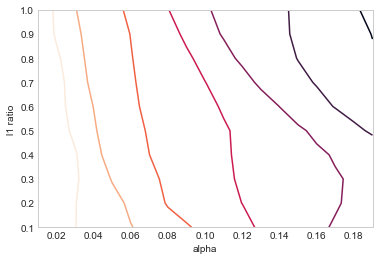

In [16]:
fig = plt.figure()
X_grid, Y_grid = np.meshgrid(a_grid, l1_ratio_grid)
plt.contour(X_grid,Y_grid,cross_score)
plt.xlabel('alpha')
plt.ylabel('l1 ratio')
plt.show()

## Random Forest

In [10]:
print ('\nFiting  Random Forest on the data')


X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)
performance = []

max_depth_grid = np.arange(3,6,1)
feat_grid = np.arange(1,X.shape[1])
n_est_grid = [200,300,400,500]

for n_est in n_est_grid:
    for index_1,m_depth in enumerate(max_depth_grid):
        print (m_depth)

        for index_2,feat in enumerate(feat_grid):

            forest = sk.ensemble.RandomForestRegressor(n_estimators=n_est , max_depth=m_depth, min_samples_split=10, min_samples_leaf=5, max_features=feat)
            scores = cross_val_score(forest, X_train, y_train, cv=2)
            avg_score = sum(scores)/len(scores)
            performance.append([n_est,m_depth,feat,avg_score])
            
performance = pd.DataFrame(performance)
index = performance.iloc[performance[3].argmax()]

best_model_rf = sk.ensemble.RandomForestRegressor(n_estimators=int(index[0]) , max_depth=int(index[1]), min_samples_split=10, min_samples_leaf=5, max_features=int(index[2]))

best_model_rf.fit(X_train,y_train)

score = best_model_rf.score(X_test,y_test)
print ('best combination of hyperparameters for random forest is n_estimators, max_depth, max_features', index[0],index[1],index[2], 'with out of sample R**2 :', score)



Fiting  Random Forest on the data
3
4
5
3
4
5
3
4
5
3
4
5
best combination of hyperparameters for random forest is n_estimators, max_depth, max_features 200.0 5.0 8.0 with out of sample R**2 : 0.645641124213


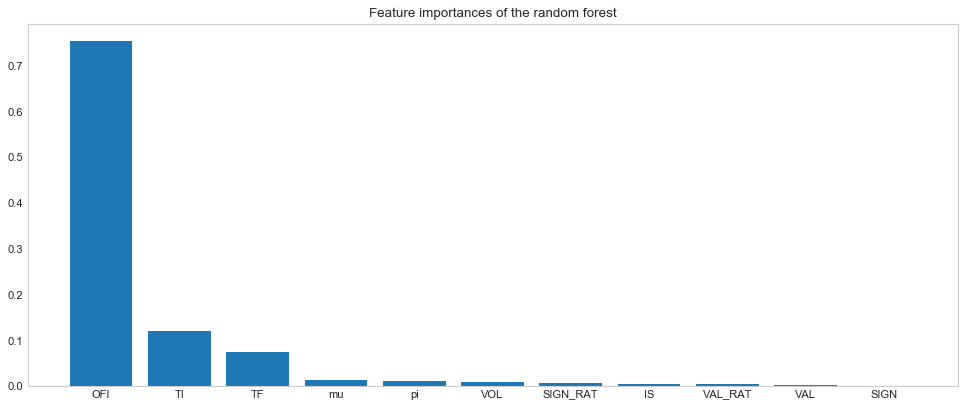

In [11]:
## (best_model.feature_importances_,)
q = rankdata(best_model_rf.feature_importances_).astype('int')

imp = np.concatenate((np.expand_dims(X_train.columns,1),np.expand_dims(best_model_rf.feature_importances_,1)),axis=1)
imp = np.concatenate((imp,np.expand_dims(q,1)),axis=1)
imp =  pd.DataFrame(imp)
imp.columns = ['Feature','Feature weight', 'Feature rank']
imp = imp.sort_values(by='Feature weight', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')
y_fig = imp[imp['Feature rank']>-1]['Feature weight']
x_fig = np.arange(y_fig.shape[0])

plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
my_xticks = imp['Feature']
plt.xticks(x_fig, my_xticks)
plt.bar(x_fig, y_fig)
plt.title('Feature importances of the random forest')
plt.show()


## Ada-Boost

In [16]:
#sklearn.ensemble.AdaBoostRegressor(base_estimator=None, n_estimators=, learning_rate=0.01, loss=’linear’)

max_depth_grid = np.arange(3,6,1)
n_estim_grid = np.arange(200,600,100)
cross_score = np.zeros((max_depth_grid.shape[0],n_estim_grid.shape[0]))
lr_grid = np.arange(0.01,0.111,0.02)
performance = []
for lr in lr_grid:
    for index_1,m_depth in enumerate(max_depth_grid):
        print ("m_depth: ", m_depth)

        for index_2,n_estim in enumerate(n_estim_grid):

            tree = sk.tree.DecisionTreeRegressor(max_depth=m_depth)
            boost = sk.ensemble.AdaBoostRegressor(base_estimator=tree, n_estimators=n_estim, learning_rate=lr, loss='linear')
            scores = cross_val_score(forest, X_train, y_train, cv=3)
            avg_score = sum(scores)/len(scores)
            performance.append([lr,m_depth,n_est,avg_score])

        
            
performance = pd.DataFrame(performance)
index = performance.iloc[performance[3].argmax()]
best_tree = sk.tree.DecisionTreeRegressor(max_depth=int(index[1]))
best_model_ada = sk.ensemble.AdaBoostRegressor(base_estimator=best_tree, n_estimators=int(index[2]), learning_rate=index[0], loss='linear')




best_model_ada.fit(X_train,y_train)

score = best_model_ada.score(X_test,y_test)
print ('best combination of hyperparameters for random forest is n_estimators, max_depth, max_features', index[0],index[1],index[2], 'with out of sample R**2 :', score)


m_depth:  3


KeyboardInterrupt: 

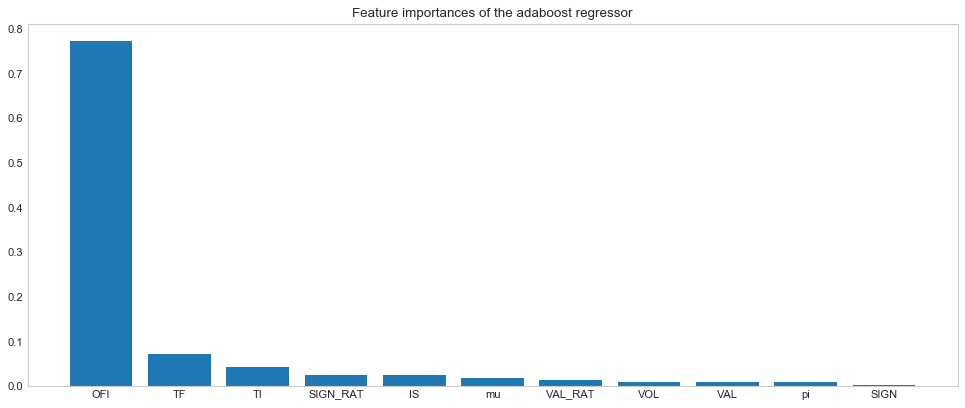

In [13]:
# (best_model.feature_importances_,)
q = rankdata(best_model_ada.feature_importances_).astype('int')

imp = np.concatenate((np.expand_dims(X_train.columns,1),np.expand_dims(best_model_ada.feature_importances_,1)),axis=1)
imp = np.concatenate((imp,np.expand_dims(q,1)),axis=1)
imp =  pd.DataFrame(imp)
imp.columns = ['Feature','Feature weight', 'Feature rank']
imp = imp.sort_values(by='Feature weight', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last')
y_fig = imp[imp['Feature rank']>-1]['Feature weight']
x_fig = np.arange(y_fig.shape[0])

plt.figure(num=None, figsize=(15, 6), dpi=80, facecolor='w', edgecolor='k')
my_xticks = imp['Feature']
plt.xticks(x_fig, my_xticks)
plt.bar(x_fig, y_fig)
plt.title('Feature importances of the adaboost regressor')
plt.show()

In [18]:
def generate_model(No_hidden, No_units=200, activation_function = 'relu',dropout = 0):

    # Initialize the constructor
    model = Sequential()
    
    #model.add(Dropout(dropout))
    model.add(Dropout(dropout, input_shape=(X_train.shape[1],)))

    # Add an input layer 
   # model.add(Dense(No_units, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(No_units, activation='relu', ))

    for i in range(No_hidden):

        # Add one hidden layer 
        model.add(Dense(No_units, activation='relu'))
        
        model.add(Dropout(dropout))
        

    # Add an output layer 
    model.add(Dense(1, activation='linear'))
    
    return (model)

In [19]:
No_hidden_in = 2
performance = []

for No_units_in in range(100,200,50):
    
    print ('new number of units: ', No_units_in)
    
    for dropout in [0.2,0.3]:
        
        print ('new dropout')
        
        model = generate_model(No_hidden_in, No_units = No_units_in, dropout = dropout)


        model.compile(loss='mean_squared_error',
                      optimizer='adam',
                      metrics=['mse'])

        model.fit(X_train, y_train,epochs=100, batch_size=10, verbose=0)
        y_pred = model.predict(X_test)
        score = model.evaluate(X_test, y_test,verbose=1)
        print ("MSE score for No_un/layer: ", No_units_in, "and No hidden layers: ", No_hidden_in, "is :", score)
        performance.append([No_units_in,dropout,score])

        
        

new number of units:  100
new dropout
2493/2493 [==============================] - 0s 32us/step
MSE score for No_un/layer:  100 and No hidden layers:  2 is : [0.59943263984042094, 0.59943263984042094]
new dropout
2493/2493 [==============================] - 0s 41us/step
MSE score for No_un/layer:  100 and No hidden layers:  2 is : [0.71262009563189743, 0.71262009563189743]
new number of units:  150
new dropout
2493/2493 [==============================] - 0s 56us/step
MSE score for No_un/layer:  150 and No hidden layers:  2 is : [0.7065472981320583, 0.7065472981320583]
new dropout
2493/2493 [==============================] - 0s 59us/step
MSE score for No_un/layer:  150 and No hidden layers:  2 is : [0.67186224290849306, 0.67186224290849306]


In [20]:
performance = pd.DataFrame(performance)
performance

,0,1,2
0,100,0.2,"[0.59943263984, 0.59943263984]"
1,100,0.3,"[0.712620095632, 0.712620095632]"
2,150,0.2,"[0.706547298132, 0.706547298132]"
3,150,0.3,"[0.671862242908, 0.671862242908]"


In [21]:
performance.to_csv('Neural nets performance')

In [22]:
poly_false = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
X_scaled = preprocessing.scale(X)
X_poly = poly_false.fit_transform(X_scaled)
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=0)

In [28]:
model = generate_model(2, No_units = 200, dropout = 0.2)

In [29]:
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['mse'])

model.fit(X_train, y_train,epochs=100, batch_size=10, verbose=0)

In [33]:
history = model.fit(X_train, y_train,epochs=100, batch_size=10, verbose=0)

dict_keys(['loss', 'mean_squared_error'])


KeyError: 'acc'

In [34]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

dict_keys(['loss', 'mean_squared_error'])


KeyError: 'acc'

In [30]:
from keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes = True)

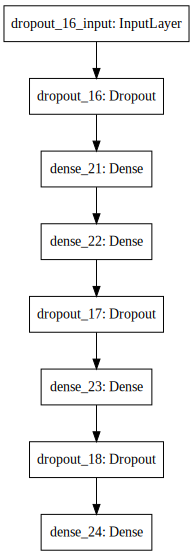

In [31]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))